# An interactive Git Tutorial: the tool you didn't know you needed

## From personal workflows to open collaboration

**Note:** this tutorial was particularly modeled, and therefore owes a lot, to the excellent materials offered in:

- "Git for Scientists: A Tutorial" by John McDonnell (no link as this tutorial seems to have disappeared from the internet).
- Emanuele Olivetti's lecture notes and exercises from the G-Node summer school on [Advanced Scientific Programming in Python](https://python.g-node.org/wiki/schedule).

In particular I've reused the excellent images from the [Pro Git book](http://git-scm.com/book) that John had already selected and downloaded, as well as some of his outline.  But this version of the tutorial aims to be 100% reproducible by being executed directly as an IPython notebook and is hosted itself on github so that others can more easily make improvements to it by collaborating on Github.  Many thanks to John and Emanuele for making their materials available online.

After writing this document, I discovered [J.R. Johansson](https://github.com/jrjohansson)'s [tutorial on version control](http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-7-Revision-Control-Software.ipynb) that is also written as a fully reproducible notebook and is also aimed at a scientific audience.  It has a similar spirit to this one, and is part of his excellent series [Lectures on Scientific Computing with Python](https://github.com/jrjohansson/scientific-python-lectures) that is entirely available as Jupyter Notebooks.

## Wikipedia

“Revision control, also known as version control, source control
or software configuration management (SCM), is the
**management of changes to documents, programs, and other
information stored as computer files.**”

**Reproducibility?**

* Tracking and recreating every step of your work
* In the software world: it's called *Version Control*!

What do (good) version control tools give you?

* Peace of mind (backups)
* Freedom (exploratory branching)
* Collaboration (synchronization)


## Git is an enabling technology: Use version control for everything

* Paper writing (never get `paper_v5_john_jane_final_oct22_really_final.tex` by email again!)
* Grant writing
* Everyday research
* Teaching (never accept an emailed homework assignment again!)

## Teaching courses with Git

![](images/indefero_projects_notes.png)

<!-- offline: 
<img src="files/images/indefero_projects_notes.png" width="100%">
<img src="https://raw.github.com/fperez/reprosw/master/fig/indefero_projects_notes.png" width="100%">
-->

## Annotated history of each student's worfklow (and backup!)

<!-- offline: 
    <img src="files/images/indefero_projects1.png" width="100%">
<img src="https://raw.github.com/fperez/reprosw/master/fig/indefero_projects1.png" width="100%">
    -->

![](images/indefero_projects1.png)

## The plan for this tutorial

This tutorial is structured in the following way: we will begin with a brief overview of key concepts you need to understand in order for git to really make sense.  We will then dive into hands-on work: after a brief interlude into necessary configuration we will discuss 5 "stages of git" with scenarios of increasing sophistication and complexity, introducing the necessary commands for each stage:
            
1. Local, single-user, linear workflow
2. Single local user, branching
3. Using remotes as a single user
4. Remotes for collaborating in a small team
5. Full-contact github: distributed collaboration with large teams
    
In reality, this tutorial only covers stages 1-4, since for #5 there are many software develoment-oriented tutorials and documents of very high quality online.  But most scientists start working alone with a few files or with a small team, so I feel it's important to build first the key concepts and practices based on problems scientists encounter in their everyday life and without the jargon of the software world.  Once you've become familiar with 1-4, the excellent tutorials that exist about collaborating on github on open-source projects should make sense.

## Very high level picture: an overview of key concepts

The **commit**: *a snapshot of work at a point in time*

<!-- offline: 
![](images/commit_anatomy.png)

<img src="https://raw.github.com/fperez/reprosw/master/fig/commit_anatomy.png">
-->

![](images/commit_anatomy.png)

Credit: ProGit book, by Scott Chacon, CC License.

A **repository**: a group of *linked* commits

<!-- offline: 
![](files/images/threecommits.png)

<img src="https://raw.github.com/fperez/reprosw/master/fig/threecommits.png" >
-->

![](images/threecommits.png)

Note: these form a Directed Acyclic Graph (DAG), with nodes identified by their *hash*.

A **hash**: a fingerprint of the content of each commit *and its parent*

In [1]:
from hashlib import sha1

# Our first commit
data1 = b'This is the start of my paper.'
meta1 = b'date: 1/1/17'
hash1 = sha1(data1 + meta1).hexdigest( )
print('Hash:', hash1)

Hash: 3b32905baabd5ff22b3832c892078f78f5e5bd3b


In [2]:
# Our second commit, linked to the first
data2 = b'Some more text in my paper...'
meta2 = b'date: 1/2/1'
# Note we add the parent hash here!
hash2 = sha1(data2 + meta2 + hash1.encode()).hexdigest()
print('Hash:', hash2)

Hash: 1c12d2aad51d5fc33e5b83a03b8787dfadde92a4


And this is pretty much the essence of Git!

## First things first: git must be configured before first use

The minimal amount of configuration for git to work without pestering you is to tell it who you are. You should run a version of these commands in your shell:

```bash
git config --global user.name "Fernando Perez"
git config --global user.email "Fernando.Perez@berkeley.edu"
```

And while we're at it, we also turn on the use of color, which is very useful

```bash
git config --global color.ui "auto"
```

### Convenient credentials management

Next, we configure git so that we manage our credentials without having to manually type our passwords for each and every operation. 

For general users, Github offers in its help pages instructions on how to configure the credentials helper for [Mac OSX](https://help.github.com/articles/caching-your-github-password-in-git/#platform-mac), [Windows](https://help.github.com/articles/caching-your-github-password-in-git/#platform-mac) and [Linux](https://help.github.com/articles/caching-your-github-password-in-git/#platform-linux).

But in this document we will focus on configuring the [github app for JupyterHub](https://github.com/yuvipanda/github-app-user-auth) developed by Berkeley's Yuvi Panda. Our JupyterHub already has this app pre-installed, which makes it very convenient to push and pull securely from selected repositories.

You will need to run this command, which adds the credentials information to the file `~/.gitconfig.local`, which we load from `~/.gitconfig` to store local information that may be different across systems (since we'll be managing the global `~/.gitconfig` file through a fairly generic public git repository):

```bash
git config -f $HOME/.gitconfig.local credential.helper "store --file=/tmp/github-app-git-credentials"
```

And then, follow these steps, which you'll need to do again each time you log into the Hub and want to push/pull to/from GitHub:

1. Go to the [Stat159 GitHub Auth App page](https://github.com/apps/stat159-berkeley-datahub-access) and add this app to your account. For now you can give it access to all your repos, or if you prefer, you can manually configure which repos you'll be using (this will require a bit more manual maintenance through the semester).
1. Open a terminal, and type `github-app-user-auth`.
1. It should give you a link to go to, and a code to input into the web page when that link is opened. Open the link, enter the code there.
1. Grant access to the device in the web page, and you're done!

Authentication is valid for 8 hours, and once it expires, this process will need to be repeated, _except for the first step_. In the future, we might have a web app or other process to make this less painful. However, keeping the length of this session limited drastically helps with security too.

Later, you can see what repositories you've given it access to by visiting [your GitHub installations page](https://github.com/settings/installations).

## Stage 1: Local, single-user, linear workflow

Type `git` to see a full list of all the 'core' commands.  We'll now go through most of these via small practical exercises:

In [3]:
!git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           [--super-prefix=<path>] [--config-env=<name>=<envvar>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone     Clone a repository into a new directory
   init      Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add       Add file contents to the index
   mv        Move or rename a file, a directory, or a symlink
   restore   Restore working tree files
   rm        Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect    Use binary search to find th

### `git init`: create an empty repository

In [4]:
%pwd

'/Users/fperez/teach/stat159/2022sp/site/lectures/intro-git'

In [5]:
%%bash
rm -rf test
git init test

Initialized empty Git repository in /Users/fperez/teach/stat159/2022sp/site/lectures/intro-git/test/.git/


**Note:** all these cells below are meant to be run by you in a terminal  where  you change *once* to the `test` directory and continue working there.

Since we are putting all of them here in a single notebook for the purposes of the tutorial, they will all be prepended with the first two lines:

    %%bash
    cd test

that tell IPython to do that each time.  But you should ignore those two lines and type the rest of each cell yourself in your terminal.

Let's look at what git did:

In [6]:
%%bash
cd test

ls

In [7]:
%%bash
cd test

ls -la

total 0
drwxr-xr-x  3 fperez  wavelet   96 Jan 25 23:50 .
drwxr-xr-x  6 fperez  wavelet  192 Jan 25 23:50 ..
drwxr-xr-x  9 fperez  wavelet  288 Jan 25 23:50 .git


In [8]:
%%bash
cd test

ls -l .git

total 24
-rw-r--r--   1 fperez  wavelet   21 Jan 25 23:50 HEAD
-rw-r--r--   1 fperez  wavelet  137 Jan 25 23:50 config
-rw-r--r--   1 fperez  wavelet   73 Jan 25 23:50 description
drwxr-xr-x  15 fperez  wavelet  480 Jan 25 23:50 hooks
drwxr-xr-x   3 fperez  wavelet   96 Jan 25 23:50 info
drwxr-xr-x   4 fperez  wavelet  128 Jan 25 23:50 objects
drwxr-xr-x   4 fperez  wavelet  128 Jan 25 23:50 refs


Now let's edit our first file in the test directory with a text editor... I'm doing it programatically here for automation purposes, but you'd normally be editing by hand

In [9]:
%%bash
cd test

echo "My first bit of text" > file1.txt

### `git add`: tell git about this new file

In [10]:
%%bash
cd test

git add file1.txt

We can now ask git about what happened with `status`:

In [11]:
%%bash
cd test

git status

On branch main

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   file1.txt



### `git commit`: permanently record our changes in git's database

For now, we are *always* going to call `git commit` either with the `-a` option *or* with specific filenames (`git commit file1 file2...`).  This delays the discussion of an aspect of git called the *index* (often referred to also as the 'staging area') that we will cover later.  Most everyday work in regular scientific practice doesn't require understanding the extra moving parts that the index involves, so on a first round we'll bypass it.  Later on we will discuss how to use it to achieve more fine-grained control of what and how git records our actions.

In [12]:
%%bash
cd test

git commit -a -m"This is our first commit"

[main (root-commit) a3ee476] This is our first commit
 1 file changed, 1 insertion(+)
 create mode 100644 file1.txt


In the commit above, we  used the `-m` flag to specify a message at the command line.  If we don't do that, git will open the editor we specified in our configuration above and require that we enter a message.  By default, git refuses to record changes that don't have a message to go along with them (though you can obviously 'cheat' by using an empty or meaningless string: git only tries to facilitate best practices, it's not your nanny).

### `git log`: what has been committed so far

In [13]:
%%bash
cd test

git log

commit a3ee47693d62d3be0e10cf25e2df2274263c32b8
Author: Fernando Pérez <fernando.perez@berkeley.edu>
Date:   Tue Jan 25 23:50:14 2022 -0800

    This is our first commit


### `git diff`: what have I changed?

Let's do a little bit more work... Again, in practice you'll be editing the files by hand, here we do it via shell commands for the sake of automation (and therefore the reproducibility of this tutorial!)

In [14]:
%%bash
cd test

echo "And now some more text..." >> file1.txt

And now we can ask git what is different:

In [15]:
%%bash
cd test

git diff

diff --git a/file1.txt b/file1.txt
index ce645c7..4baa979 100644
--- a/file1.txt
+++ b/file1.txt
@@ -1 +1,2 @@
 My first bit of text
+And now some more text...


The format of the output above is well explained in detail in [this Stack Overflow post](https://stackoverflow.com/questions/2529441/how-to-read-the-output-from-git-diff).  But we can provide a brief summary here:

```
diff --git a/file1.txt b/file1.txt
```

This tells us which files changed overall, with 'a' representing the old path and 'b' the new one (in this case it's the same file, though if a file had been renamed it would be different).

```
index ce645c7..4baa979 100644
```
These are hashes of the file at the two stages, needed by git itself for other operations with the diff output.

The next block shows the actual changes. The first two lines show which paths are being compared (in this case the same file, `file1.txt`): 


```
--- a/file1.txt
+++ b/file1.txt
```

The next line indicates where the changes happened. The format is `@@ from-file-range to-file-range @@`, where there's one more `@` character than there's parents to the file comparison (git can handle multi-way diff/merges), adn the file range format is `-/+<start line>,<# of lines>`, with `-` for the `from-file` and `+` for the `to-file`:

```
@@ -1 +1,2 @@
```

Lines prepended with `-` correspond to deletions (none in this case), and lines with `+` to additions. A few lines around deletions/additions are shown for context:

```
 My first bit of text
+And now some more text...
```

### The cycle of git virtue: work, commit, work, commit, ...

In [16]:
%%bash
cd test

git commit -a -m"I have made great progress on this critical matter."

[main 963d786] I have made great progress on this critical matter.
 1 file changed, 1 insertion(+)


### `git log` revisited

First, let's see what the log shows us now:

In [17]:
%%bash
cd test

git log

commit 963d78694d2b4e10d8b2fea40181760314186e21
Author: Fernando Pérez <fernando.perez@berkeley.edu>
Date:   Tue Jan 25 23:50:23 2022 -0800

    I have made great progress on this critical matter.

commit a3ee47693d62d3be0e10cf25e2df2274263c32b8
Author: Fernando Pérez <fernando.perez@berkeley.edu>
Date:   Tue Jan 25 23:50:14 2022 -0800

    This is our first commit


Sometimes it's handy to see a very summarized version of the log:

In [18]:
%%bash
cd test

git log --oneline --topo-order --graph

* 963d786 I have made great progress on this critical matter.
* a3ee476 This is our first commit


Git supports *aliases:* new names given to command combinations. Let's make this handy shortlog an alias, so we only have to type `git slog` and see this compact log:

In [19]:
%%bash
cd test

# We create our alias (this saves it in git's permanent configuration file):
git config --global alias.slog "log --oneline --topo-order --graph"

# And now we can use it
git slog

* 963d786 I have made great progress on this critical matter.
* a3ee476 This is our first commit


### `git mv` and `rm`: moving and removing files

While `git add` is used to add fils to the list git tracks, we must also tell it if we want their  names to change or for it to stop tracking them.  In familiar Unix fashion, the `mv` and `rm` git commands do precisely this:

In [20]:
%%bash
cd test

git mv file1.txt file-newname.txt
git status

On branch main
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	renamed:    file1.txt -> file-newname.txt



Note that these changes must be committed too, to become permanent!  In git's world, until something hasn't been committed, it isn't permanently recorded anywhere.

In [21]:
%%bash
cd test

git commit -a -m"I like this new name better"
echo "Let's look at the log again:"
git slog

[main ae5580b] I like this new name better
 1 file changed, 0 insertions(+), 0 deletions(-)
 rename file1.txt => file-newname.txt (100%)
Let's look at the log again:
* ae5580b I like this new name better
* 963d786 I have made great progress on this critical matter.
* a3ee476 This is our first commit


And `git rm` works in a similar fashion.

### Exercise

Add a new file `file2.txt`, commit it, make some changes to it, commit them again, and then remove it (and don't forget to commit this last step!).

## Local user, branching

What is a branch?  Simply a *label for the 'current' commit in a sequence of ongoing commits*:

![](images/masterbranch.png)

<!-- offline: 
<img src="https://raw.github.com/fperez/reprosw/master/fig/masterbranch.png" >
-->

There can be multiple branches alive at any point in time; the working directory is the state of a special pointer called HEAD.  In this example there are two branches, *master* and *testing*, and *testing* is the currently active branch since it's what HEAD points to:

![](images/HEAD_testing.png)

<!-- offline: 
<img src="https://raw.github.com/fperez/reprosw/master/fig/HEAD_testing.png" >
-->

Once new commits are made on a branch, HEAD and the branch label move with the new commits:

![](images/branchcommit.png)

This allows the history of both branches to diverge:

![](images/mergescenario.png)

But based on this graph structure, git can compute the necessary information to merge the divergent branches back and continue with a unified line of development:
    
![](images/mergeaftermath.png)

Let's now illustrate all of this with a concrete example.  Let's get our bearings first:

In [22]:
%%bash
cd test

git status
ls

On branch main
nothing to commit, working tree clean
file-newname.txt


We are now going to try two different routes of development: on the `master` branch we will add one file and on the `experiment` branch, which we will create, we will add a different one.  We will then merge the experimental branch into `master`.

In [23]:
%%bash
cd test

git switch -c experiment

Switched to a new branch 'experiment'


In [24]:
%%bash
cd test

echo "Some crazy idea" > experiment.txt
git add experiment.txt
git commit -a -m"Trying something new"
git slog

[experiment b71b77a] Trying something new
 1 file changed, 1 insertion(+)
 create mode 100644 experiment.txt
* b71b77a Trying something new
* ae5580b I like this new name better
* 963d786 I have made great progress on this critical matter.
* a3ee476 This is our first commit


In [25]:
%%bash
cd test

git switch main
git slog

Switched to branch 'main'


* ae5580b I like this new name better
* 963d786 I have made great progress on this critical matter.
* a3ee476 This is our first commit


In [26]:
%%bash
cd test

echo "All the while, more work goes on in master..." >> file-newname.txt
git commit -a -m"The mainline keeps moving"
git slog

[main eddded5] The mainline keeps moving
 1 file changed, 1 insertion(+)
* eddded5 The mainline keeps moving
* ae5580b I like this new name better
* 963d786 I have made great progress on this critical matter.
* a3ee476 This is our first commit


By default, all variations of the git `log` commands only show the currently active branch.  If we want to see *all* branches, we can ask for them with the `--all` flag:

In [27]:
%%bash
cd test

git slog --all

* eddded5 The mainline keeps moving
| * b71b77a Trying something new
|/  
* ae5580b I like this new name better
* 963d786 I have made great progress on this critical matter.
* a3ee476 This is our first commit


Above, we can see the commit whose message is `Try something new`, that comes from the `experiment` branch.

In [28]:
%%bash
cd test

ls

file-newname.txt


In [29]:
%%bash
cd test

git merge experiment
git slog

Merge made by the 'ort' strategy.
 experiment.txt | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 experiment.txt
*   e752aa4 Merge branch 'experiment'
|\  
| * b71b77a Trying something new
* | eddded5 The mainline keeps moving
|/  
* ae5580b I like this new name better
* 963d786 I have made great progress on this critical matter.
* a3ee476 This is our first commit


## Using remotes as a single user

We are now going to introduce the concept of a *remote repository*: a pointer to another copy of the repository that lives on a different location.  This can be simply a different path on the filesystem or a server on the internet.

For this discussion, we'll be using remotes hosted on the [GitHub.com](http://github.com) service, but you can equally use other services like [BitBucket](http://bitbucket.org) or [Gitorious](http://gitorious.org) as well as host your own.

In [30]:
%%bash
cd test

ls
echo "Let's see if we have any remote repositories here:"
git remote -v

experiment.txt
file-newname.txt
Let's see if we have any remote repositories here:


Since the above cell didn't produce any output after the `git remote -v` call, it means we have no remote repositories configured.  We will now proceed to do so.  Once logged into GitHub, go to the [new repository page](https://github.com/new) and make a repository called `test`.  Do **not** check the box that says `Initialize this repository with a README`, since we already have an existing repository here.  That option is useful when you're starting first at Github and don't have a repo made already on a local computer.

We can now follow the instructions from the next page:

In [36]:
%%bash
cd test

git remote add origin https://github.com/fperez/test.git
git branch -M main
git push -u origin main

error: remote origin already exists.
To https://github.com/fperez/test.git
 * [new branch]      main -> main


branch 'main' set up to track 'origin/main'.


Let's see the remote situation again:

In [37]:
%%bash
cd test

git remote -v

origin	https://github.com/fperez/test.git (fetch)
origin	https://github.com/fperez/test.git (push)


We can now [see this repository publicly on github](https://github.com/fperez/test).

Let's see how this can be useful for backup and syncing work between two different computers.  I'll simulate a 2nd computer by working in a different directory...

In [38]:
%%bash

# Here I clone my 'test' repo but with a different name, test2, to simulate a 2nd computer
git clone https://github.com/fperez/test.git test2
cd test2
pwd
git remote -v

Cloning into 'test2'...


/Users/fperez/teach/stat159/2022sp/site/lectures/intro-git/test2
origin	https://github.com/fperez/test.git (fetch)
origin	https://github.com/fperez/test.git (push)


Let's now make some changes in one 'computer' and synchronize them on the second.

In [39]:
%%bash
cd test2  # working on computer #2

echo "More new content on my experiment" >> experiment.txt
git commit -a -m"More work, on machine #2"

[main 2320847] More work, on machine #2
 1 file changed, 1 insertion(+)


Now we put this new work up on the github server so it's available from the internet

In [40]:
%%bash
cd test2

git push

To https://github.com/fperez/test.git
   e752aa4..2320847  main -> main


Now let's fetch that work from machine #1:

In [41]:
%%bash
cd test

git pull

From https://github.com/fperez/test
   e752aa4..2320847  main       -> origin/main


Updating e752aa4..2320847
Fast-forward
 experiment.txt | 1 +
 1 file changed, 1 insertion(+)


### An important aside: conflict management

While git is very good at merging, if two different branches modify the same file in the same location, it simply can't decide which change should prevail.  At that point, human intervention is necessary to make the decision.  Git will help you by marking the location in the file that has a problem, but it's up to you to resolve the conflict.  Let's see how that works by intentionally creating a conflict.

We start by creating a branch and making a change to our experiment file:

In [99]:
%%bash
cd test

git switch -c trouble
echo "This is going to be a problem..." >> experiment.txt
git commit -a -m"Changes in the trouble branch"

[trouble c480fb4] Changes in the trouble branch
 1 file changed, 1 insertion(+)


Switched to branch 'trouble'


And now we go back to the master branch, where we change the *same* file:

In [100]:
%%bash
cd test

git switch main
echo "More work on the master branch..." >> experiment.txt
git commit -a -m"Mainline work"

Your branch is up-to-date with 'origin/master'.
[master a8694ad] Mainline work
 1 file changed, 1 insertion(+)


Switched to branch 'master'


So now let's see what happens if we try to merge the `trouble` branch into `master`:

In [101]:
%%bash
cd test

git merge trouble

Auto-merging experiment.txt
CONFLICT (content): Merge conflict in experiment.txt
Automatic merge failed; fix conflicts and then commit the result.


Let's see what git has put into our file:

In [102]:
%%bash
cd test

cat experiment.txt

Some crazy idea
More new content on my experiment
<<<<<<< HEAD
More work on the master branch...
This is going to be a problem...
>>>>>>> trouble


At this point, we go into the file with a text editor, decide which changes to keep, and make a new commit that records our decision.  I've now made the edits, in this case I decided that both pieces of text were useful, but integrated them with some changes:

In [103]:
%%bash
cd test

cat experiment.txt

Some crazy idea
More new content on my experiment
More work on the master branch...
This is going to be a problem...


Let's then make our new commit:

In [104]:
%%bash
cd test

git commit -a -m"Completed merge of trouble, fixing conflicts along the way"
git slog

[master 28e0c56] Completed merge of trouble, fixing conflicts along the way
*   28e0c56 Completed merge of trouble, fixing conflicts along the way
|\  
| * c480fb4 Changes in the trouble branch
* | a8694ad Mainline work
|/  
* 94c7438 More work, on machine #2
*   27b0ec9 Merge branch 'experiment'
|\  
| * 2cba531 Trying something new
* | ff8b2ec The mainline keeps moving
|/  
* 005d8e2 I like this new name better
* e819b08 I have made great progress on this critical matter.
* 1f299f3 This is our first commit


*Note:* While it's a good idea to understand the basics of fixing merge conflicts by hand, in some cases you may find the use of an automated tool useful.  Git supports multiple [merge tools](https://www.kernel.org/pub/software/scm/git/docs/git-mergetool.html): a merge tool is a piece of software that conforms to a basic interface and knows how to merge two files into a new one.  Since these are typically graphical tools, there are various to choose from for the different operating systems, and as long as they obey a basic command structure, git can work with any of them.

## Collaborating on github with a small team

Single remote with shared access: we are going to set up a shared collaboration with one partner (the person sitting next to you).  This will show the basic workflow of collaborating on a project with a small team where everyone has write privileges to the same repository.  

Note for SVN users: this is similar to the classic SVN workflow, with the distinction that commit and push are separate steps.  SVN, having no local repository, commits directly to the shared central resource, so to a first approximation you can think of `svn commit` as being synonymous with `git commit; git push`.

We will have two people, let's call them Alice and Bob, sharing a repository.  Alice will be the owner of the repo and she will give Bob write privileges.  

We begin with a simple synchronization example, much like we just did above, but now between *two people* instead of one person.  Otherwise it's the same:

- Bob clones Alice's repository.
- Bob makes changes to a file and commits them locally.
- Bob pushes his changes to github.
- Alice pulls Bob's changes into her own repository.

Next, we will have both parties make non-conflicting changes each, and commit them locally.  Then both try to push their changes:

- Alice adds a new file, `alice.txt` to the repo and commits.
- Bob adds `bob.txt` and commits.
- Alice pushes to github.
- Bob tries to push to github.  What happens here?

The problem is that Bob's changes create a commit that conflicts with Alice's, so git refuses to apply them.  It forces Bob to first do the merge on his machine, so that if there is a conflict in the merge, Bob deals with the conflict manually (git could try to do the merge on the server, but in that case if there's a conflict, the server repo would be left in a conflicted state without a human to fix things up).  The solution is for Bob to first pull the changes (pull in git is really fetch+merge), and then push again.

## Full-contact github: distributed collaboration with large teams

Multiple remotes and merging based on pull request workflow: this is beyond the scope of this brief tutorial, so we'll simply discuss how it works very briefly, illustrating it with the activity on the [IPython github repository](http://github.com/ipython/ipython).

## Other useful commands

- [show](http://www.kernel.org/pub/software/scm/git/docs/git-show.html)
- [reflog](http://www.kernel.org/pub/software/scm/git/docs/git-reflog.html)
- [rebase](http://www.kernel.org/pub/software/scm/git/docs/git-rebase.html)
- [tag](http://www.kernel.org/pub/software/scm/git/docs/git-tag.html)

## Git resources

### Introductory materials

There are lots of good tutorials and introductions for Git, which you
can easily find yourself; this is just a short list of things I've found
useful.  For a beginner, I would recommend the following 'core' reading list, and
below I mention a few extra resources:

1. The smallest, and in the style of this tuorial: [git - the simple guide](http://rogerdudler.github.com/git-guide)
contains 'just the basics'.  Very quick read.

1. In my own experience, the most useful resource was [Understanding Git
Conceptually](http://www.sbf5.com/~cduan/technical/git).
Git has a reputation for being hard to use, but I have found that with a
clear view of what is actually a *very simple* internal design, its
behavior is remarkably consistent, simple and comprehensible.

1.  For more detail, see the start of the excellent [Pro Git book](http://book.git-scm.com).

1. You can also [try Git in your browser](https://try.github.io) thanks to GitHub's interactive tutorial.

If you are really impatient and just want a quick start, this [visual git tutorial](http://www.ralfebert.de/blog/tools/visual_git_tutorial_1)
may be sufficient. It is nicely illustrated with diagrams that show what happens on the filesystem.

For windows users, [an Illustrated Guide to Git on Windows](http://nathanj.github.com/gitguide/tour.html) is useful in that
it contains also some information about handling SSH (necessary to interface with git hosted on remote servers when collaborating) as well
as screenshots of the Windows interface.

Cheat sheets: a useful [summary of common commands](https://github.com/nerdgirl/git-cheatsheet-visual/blob/master/gitcheatsheet.pdf) in PDF format that can be printed for frequent reference.  [Another nice PDF one](https://services.github.com/on-demand/downloads/github-git-cheat-sheet.pdf).

### Beyond the basics

At some point, it will pay off to understand how git itself is *built*.  These two documents, written in a similar spirit, are probably the most useful descriptions of the Git architecture short of diving into the actual implementation.  They walk you through
how you would go about building a version control system with a little story. By the end you realize that Git's model is almost an inevitable outcome of the proposed constraints:

The [Git parable](http://tom.preston-werner.com/2009/05/19/the-git-parable.html) by Tom Preston-Werner.

[Git foundations](http://matthew-brett.github.com/pydagogue/foundation.html) by Matthew Brett.

[Git ready](http://www.gitready.com): A great website of posts on specific git-related topics, organized by difficulty.

[QGit](http://sourceforge.net/projects/qgit/): an excellent Git GUI.

Git ships by default with gitk and git-gui, a pair of Tk graphical clients to browse a repo and to operate in it. I personally have found [qgit](http://sourceforge.net/projects/qgit/) to be nicer and easier to use. It is available on modern linux distros, and since it is based on Qt, it should run on OSX and Windows.

[Git Magic](http://www-cs-students.stanford.edu/~blynn/gitmagic/index.html)

Another book-size guide that has useful snippets.

A [port](http://cworth.org/hgbook-git/tour) of the Hg book's beginning

The [Mercurial book](http://hgbook.red-bean.com) has a reputation for clarity, so Carl Worth decided to [port](http://cworth.org/hgbook-git/tour) its introductory chapter to Git. It's a nicely written intro, which is possible in good measure because of how similar the underlying models of Hg and Git ultimately are.


Finally, if you prefer a video presentation, this 1-hour tutorial prepared by the GitHub educational team will walk you through the entire process:

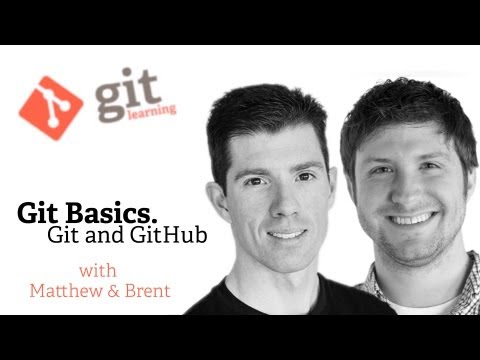

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('U8GBXvdmHT4')

### A few useful tips for common tasks

#### Better shell support



Adding git branch info to your bash prompt and tab completion for git commands and branches is extremely useful.  I suggest you at least copy:

- [git-completion.bash](https://github.com/git/git/blob/master/contrib/completion/git-completion.bash)
- [git-prompt.sh](https://github.com/git/git/blob/master/contrib/completion/git-prompt.sh)
 
You can then source both of these files in your `~/.bashrc` and then set your prompt (I'll assume you named them as the originals but starting with a `.` at the front of the name):

    source $HOME/.git-completion.bash
    source $HOME/.git-prompt.sh
    PS1='[\u@\h \W$(__git_ps1 " (%s)")]\$ '   # adjust this to your prompt liking

See the comments in both of those files for lots of extra functionality they offer.

#### Embedding Git information in LaTeX documents

(Sent by [Yaroslav Halchenko](http://www.onerussian.com))

I use a Make rule:

    # Helper if interested in providing proper version tag within the manuscript
    revision.tex: ../misc/revision.tex.in ../.git/index
       GITID=$$(git log -1 | grep -e '^commit' -e '^Date:' | sed  -e 's/^[^ ]* *//g' | tr '\n' ' '); \
       echo $$GITID; \
       sed -e "s/GITID/$$GITID/g" $< >| $@

in the top level `Makefile.common` which is included in all
subdirectories which actually contain papers (hence all those
`../.git`). The `revision.tex.in` file is simply:

    % Embed GIT ID revision and date
    \def\revision{GITID}

The corresponding `paper.pdf` depends on `revision.tex` and includes the
line `\input{revision}` to load up the actual revision mark.

#### git export

Git doesn't have a native export command, but this works just fine:

    git archive --prefix=fperez.org/  master | gzip > ~/tmp/source.tgz